In [1]:
import sys
from pathlib import Path

import pandas as pd

from wind_up.constants import OUTPUT_DIR, PROJECTROOT_DIR
from wind_up.interface import AssessmentInputs
from wind_up.main_analysis import run_wind_up_analysis
from wind_up.models import PlotConfig, WindUpConfig
from wind_up.reanalysis_data import ReanalysisDataset

sys.path.append(str(PROJECTROOT_DIR))
from examples.helpers import download_zenodo_data

CACHE_DIR = PROJECTROOT_DIR / "cache" / "smarteole_example_data"

ANALYSIS_TIMEBASE_S = 600
CACHE_SUBDIR = CACHE_DIR / f"timebase_{ANALYSIS_TIMEBASE_S}"
CACHE_SUBDIR.mkdir(exist_ok=True, parents=True)

ENSURE_DOWNLOAD = 1
CHECK_RESULTS = 1
ZIP_FILENAME = "SMARTEOLE-WFC-open-dataset.zip"
MINIMUM_DATA_COUNT_COVERAGE = 0.5  # 50% of the data must be present

C:\Users\aclerc\Documents\GitHub\wind-up\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHECK_RESULTS

1

In [3]:
analysis_output_dir = OUTPUT_DIR / "smarteole_example"
analysis_output_dir.mkdir(exist_ok=True, parents=True)

In [4]:
download_zenodo_data(record_id="7342466", output_dir=CACHE_DIR, filenames={ZIP_FILENAME})

[WindowsPath('C:/Users/aclerc/Documents/GitHub/wind-up/cache/smarteole_example_data/SMARTEOLE-WFC-open-dataset.zip')]

In [5]:
from smarteole_example import _unpack_scada
scada_df = _unpack_scada(ANALYSIS_TIMEBASE_S)
scada_df.head()

TurbineName  ActivePowerMean  ActivePowerSD  \
TimeStamp_StartFormat                                               
2020-02-17 16:30:00          SMV1        2017.8566        57.0837   
2020-02-17 16:40:00          SMV1        1946.2472        91.7614   
2020-02-17 16:50:00          SMV1        1946.5069        98.3934   
2020-02-17 17:00:00          SMV1        1828.9365       139.5910   
2020-02-17 17:10:00          SMV1        1751.7035       170.2128   

                       WindSpeedMean  WindSpeedSD  YawAngleMean  YawAngleMin  \
TimeStamp_StartFormat                                                          
2020-02-17 16:30:00          13.6164       1.2411    247.884662      239.930   
2020-02-17 16:40:00          13.0139       1.0178    259.686000      259.686   
2020-02-17 16:50:00          12.5818       0.9482    259.686000      259.686   
2020-02-17 17:00:00          11.6641       0.9244    252.924035      249.808   
2020-02-17 17:10:00          11.3144       1.0116    249.808000      249.808   

                       YawAngleMax  PitchAngleMean  GenRpmMean  AmbientTemp  \
TimeStamp_StartFormat                                                         
2020-02-17 16:30:00        259.686          6.0648   1800.5394      11.6191   
2020-02-17 16:40:00        259.686          3.5153   1798.7652      11.5493   
2020-02-17 16:50:00        259.686          2.1367   1799.5171      11.4929   
2020-02-17 17:00:00        259.686          0.8526   1799.4533      11.4735   
2020-02-17 17:10:00        249.808          0.2404   1799.2136      11.3937   

                       ShutdownDuration  
TimeStamp_StartFormat                    
2020-02-17 16:30:00                   0  
2020-02-17 16:40:00                   0  
2020-02-17 16:50:00                   0  
2020-02-17 17:00:00                   0  
2020-02-17 17:10:00                   0

In [6]:
scada_df.head()

TurbineName  ActivePowerMean  ActivePowerSD  \
TimeStamp_StartFormat                                               
2020-02-17 16:30:00          SMV1        2017.8566        57.0837   
2020-02-17 16:40:00          SMV1        1946.2472        91.7614   
2020-02-17 16:50:00          SMV1        1946.5069        98.3934   
2020-02-17 17:00:00          SMV1        1828.9365       139.5910   
2020-02-17 17:10:00          SMV1        1751.7035       170.2128   

                       WindSpeedMean  WindSpeedSD  YawAngleMean  YawAngleMin  \
TimeStamp_StartFormat                                                          
2020-02-17 16:30:00          13.6164       1.2411    247.884662      239.930   
2020-02-17 16:40:00          13.0139       1.0178    259.686000      259.686   
2020-02-17 16:50:00          12.5818       0.9482    259.686000      259.686   
2020-02-17 17:00:00          11.6641       0.9244    252.924035      249.808   
2020-02-17 17:10:00          11.3144       1.0116    249.808000      249.808   

                       YawAngleMax  PitchAngleMean  GenRpmMean  AmbientTemp  \
TimeStamp_StartFormat                                                         
2020-02-17 16:30:00        259.686          6.0648   1800.5394      11.6191   
2020-02-17 16:40:00        259.686          3.5153   1798.7652      11.5493   
2020-02-17 16:50:00        259.686          2.1367   1799.5171      11.4929   
2020-02-17 17:00:00        259.686          0.8526   1799.4533      11.4735   
2020-02-17 17:10:00        249.808          0.2404   1799.2136      11.3937   

                       ShutdownDuration  
TimeStamp_StartFormat                    
2020-02-17 16:30:00                   0  
2020-02-17 16:40:00                   0  
2020-02-17 16:50:00                   0  
2020-02-17 17:00:00                   0  
2020-02-17 17:10:00                   0

In [7]:
from smarteole_example import _unpack_metadata
metadata_df = _unpack_metadata()
metadata_df.head()

Name  Latitude  Longitude TimeZone  TimeSpanMinutes TimeFormat
0  SMV1  49.84975    2.80194      UTC               10      Start
1  SMV2  49.84661    2.80150      UTC               10      Start
2  SMV3  49.84347    2.80162      UTC               10      Start
3  SMV4  49.84033    2.80122      UTC               10      Start
4  SMV5  49.83719    2.80080      UTC               10      Start

In [8]:
from smarteole_example import _unpack_toggle_data
toggle_df = _unpack_toggle_data(ANALYSIS_TIMEBASE_S)
toggle_df.head()

toggle_on  toggle_off  yaw_offset_command
TimeStamp_StartFormat                                               
2020-02-17 16:30:00+00:00      False        True                 0.0
2020-02-17 16:40:00+00:00      False        True                 0.0
2020-02-17 16:50:00+00:00      False        True                 0.0
2020-02-17 17:00:00+00:00       True       False                 0.0
2020-02-17 17:10:00+00:00       True       False                 0.0

In [9]:
toggle_df_no_tz = toggle_df.copy()
toggle_df_no_tz.index = toggle_df_no_tz.index.tz_localize(None)
scada_df = scada_df.merge(toggle_df_no_tz["yaw_offset_command"], left_index=True, right_index=True, how="left")
scada_df["yaw_offset_command"] = scada_df["yaw_offset_command"].where(scada_df["TurbineName"] == "SMV6", 0)
del toggle_df_no_tz
scada_df.head()

TurbineName  ActivePowerMean  ActivePowerSD  \
TimeStamp_StartFormat                                               
2020-02-17 16:30:00          SMV1        2017.8566        57.0837   
2020-02-17 16:40:00          SMV1        1946.2472        91.7614   
2020-02-17 16:50:00          SMV1        1946.5069        98.3934   
2020-02-17 17:00:00          SMV1        1828.9365       139.5910   
2020-02-17 17:10:00          SMV1        1751.7035       170.2128   

                       WindSpeedMean  WindSpeedSD  YawAngleMean  YawAngleMin  \
TimeStamp_StartFormat                                                          
2020-02-17 16:30:00          13.6164       1.2411    247.884662      239.930   
2020-02-17 16:40:00          13.0139       1.0178    259.686000      259.686   
2020-02-17 16:50:00          12.5818       0.9482    259.686000      259.686   
2020-02-17 17:00:00          11.6641       0.9244    252.924035      249.808   
2020-02-17 17:10:00          11.3144       1.0116    249.808000      249.808   

                       YawAngleMax  PitchAngleMean  GenRpmMean  AmbientTemp  \
TimeStamp_StartFormat                                                         
2020-02-17 16:30:00        259.686          6.0648   1800.5394      11.6191   
2020-02-17 16:40:00        259.686          3.5153   1798.7652      11.5493   
2020-02-17 16:50:00        259.686          2.1367   1799.5171      11.4929   
2020-02-17 17:00:00        259.686          0.8526   1799.4533      11.4735   
2020-02-17 17:10:00        249.808          0.2404   1799.2136      11.3937   

                       ShutdownDuration  yaw_offset_command  
TimeStamp_StartFormat                                        
2020-02-17 16:30:00                   0                 0.0  
2020-02-17 16:40:00                   0                 0.0  
2020-02-17 16:50:00                   0                 0.0  
2020-02-17 17:00:00                   0                 0.0  
2020-02-17 17:10:00                   0                 0.0

In [10]:
reanalysis_dataset = ReanalysisDataset(
        id="ERA5T_50.00N_2.75E_100m_1hr",
        data=pd.read_parquet(Path("smarteole_data")/ "ERA5T_50.00N_2.75E_100m_1hr_20200201_20200531.parquet"),
    )
reanalysis_dataset.data.head()

10_m_hws_mean_mps  10_m_hwd_mean_deg-n_true  \
datetime_start_utc                                                       
2020-02-01 00:00:00+00:00               6.29                     203.1   
2020-02-01 01:00:00+00:00               6.57                     204.3   
2020-02-01 02:00:00+00:00               6.54                     209.5   
2020-02-01 03:00:00+00:00               6.29                     216.2   
2020-02-01 04:00:00+00:00               6.06                     220.8   

                           100_m_hws_mean_mps  100_m_hwd_mean_deg-n_true  \
datetime_start_utc                                                         
2020-02-01 00:00:00+00:00               10.33                      206.6   
2020-02-01 01:00:00+00:00               10.80                      207.4   
2020-02-01 02:00:00+00:00               10.69                      212.1   
2020-02-01 03:00:00+00:00               10.25                      218.9   
2020-02-01 04:00:00+00:00                9.81                      223.6   

                           2_m_temp_mean_deg-c  2_m_dew_point_temp_deg-c  \
datetime_start_utc                                                         
2020-02-01 00:00:00+00:00                 11.6                       9.8   
2020-02-01 01:00:00+00:00                 11.6                      10.2   
2020-02-01 02:00:00+00:00                 11.6                      10.7   
2020-02-01 03:00:00+00:00                 11.6                      11.1   
2020-02-01 04:00:00+00:00                 11.6                      11.3   

                           2_m_rh_mean_%  0_m_pres_mean_pa  \
datetime_start_utc                                           
2020-02-01 00:00:00+00:00           88.9           99621.8   
2020-02-01 01:00:00+00:00           91.2           99547.5   
2020-02-01 02:00:00+00:00           93.9           99486.1   
2020-02-01 03:00:00+00:00           96.4           99432.0   
2020-02-01 04:00:00+00:00           97.9           99341.0   

                           sea_level_pres_mean_pa  boundary_layer_height_m  \
datetime_start_utc                                                           
2020-02-01 00:00:00+00:00                100815.6                    834.2   
2020-02-01 01:00:00+00:00                100739.8                    813.0   
2020-02-01 02:00:00+00:00                100678.0                    808.8   
2020-02-01 03:00:00+00:00                100623.2                    823.8   
2020-02-01 04:00:00+00:00                100530.8                    788.9   

                           total_cloud_cover_%  \
datetime_start_utc                               
2020-02-01 00:00:00+00:00                100.0   
2020-02-01 01:00:00+00:00                100.0   
2020-02-01 02:00:00+00:00                100.0   
2020-02-01 03:00:00+00:00                100.0   
2020-02-01 04:00:00+00:00                100.0   

                           instantaneous_surface_sensible_heat_flux_wpm2  \
datetime_start_utc                                                         
2020-02-01 00:00:00+00:00                                         30.138   
2020-02-01 01:00:00+00:00                                         33.538   
2020-02-01 02:00:00+00:00                                         32.996   
2020-02-01 03:00:00+00:00                                         27.442   
2020-02-01 04:00:00+00:00                                         22.671   

                           friction_velocity_mps  cloud_base_height_m  \
datetime_start_utc                                                      
2020-02-01 00:00:00+00:00               0.441049                204.6   
2020-02-01 01:00:00+00:00               0.435240                 30.8   
2020-02-01 02:00:00+00:00               0.424339                 30.8   
2020-02-01 03:00:00+00:00               0.411508                 30.8   
2020-02-01 04:00:00+00:00               0.396724                 30.8   

                           surface_solar_radiation_downwards_wpm

In [11]:
wtg_map = {
        f"SMV{i}": {
            "name": f"SMV{i}",
            "turbine_type": {
                "turbine_type": "Senvion-MM82-2050",
                "rotor_diameter_m": 82.0,
                "rated_power_kw": 2050.0,
                "cutout_ws_mps": 25,
                "normal_operation_pitch_range": (-10.0, 35.0),
                "normal_operation_genrpm_range": (250.0, 2000.0),
                "rpm_v_pw_margin_factor": 0.05,
                "pitch_to_stall": False,
            },
        }
        for i in range(1, 7 + 1)
    }
northing_corrections_utc = [
    ("SMV1", pd.Timestamp("2020-02-17 16:30:00+0000"), 5.750994540354649),
    ("SMV2", pd.Timestamp("2020-02-17 16:30:00+0000"), 5.690999999999994),
    ("SMV3", pd.Timestamp("2020-02-17 16:30:00+0000"), 5.558000000000042),
    ("SMV4", pd.Timestamp("2020-02-17 16:30:00+0000"), 5.936999999999996),
    ("SMV5", pd.Timestamp("2020-02-17 16:30:00+0000"), 6.797253350869262),
    ("SMV6", pd.Timestamp("2020-02-17 16:30:00+0000"), 5.030130916842758),
    ("SMV7", pd.Timestamp("2020-02-17 16:30:00+0000"), 4.605999999999972),
]

wd_filter_margin = 3 + 7 * ANALYSIS_TIMEBASE_S / 600
cfg = WindUpConfig(
    assessment_name="smarteole_example",
    timebase_s=ANALYSIS_TIMEBASE_S,
    require_ref_wake_free=True,
    detrend_min_hours=12,
    ref_wd_filter=[207 - wd_filter_margin, 236 + wd_filter_margin],  # steer is from 207-236
    filter_all_test_wtgs_together=True,
    use_lt_distribution=False,
    out_dir=analysis_output_dir,
    test_wtgs=[wtg_map["SMV6"], wtg_map["SMV5"]],
    ref_wtgs=[wtg_map["SMV7"]],
    ref_super_wtgs=[],
    non_wtg_ref_names=[],
    analysis_first_dt_utc_start=pd.Timestamp("2020-02-17 16:30:00+0000"),
    upgrade_first_dt_utc_start=pd.Timestamp("2020-02-17 16:30:00+0000"),
    analysis_last_dt_utc_start=pd.Timestamp("2020-05-25 00:00:00+0000") - pd.Timedelta(seconds=ANALYSIS_TIMEBASE_S),
    lt_first_dt_utc_start=pd.Timestamp("2020-02-17 16:30:00+0000"),
    lt_last_dt_utc_start=pd.Timestamp("2020-05-25 00:00:00+0000") - pd.Timedelta(seconds=ANALYSIS_TIMEBASE_S),
    detrend_first_dt_utc_start=pd.Timestamp("2020-02-17 16:30:00+0000"),
    detrend_last_dt_utc_start=pd.Timestamp("2020-05-25 00:00:00+0000") - pd.Timedelta(seconds=ANALYSIS_TIMEBASE_S),
    years_for_lt_distribution=0,
    years_for_detrend=0,
    ws_bin_width=1.0,
    asset={
        "name": "Sole du Moulin Vieux",
        "wtgs": list(wtg_map.values()),
        "masts_and_lidars": [],
    },
    northing_corrections_utc=northing_corrections_utc,
    toggle={
        "name": "wake steering",
        "toggle_file_per_turbine": False,
        "toggle_filename": "SMV_offset_active_toggle_df.parquet",
        "detrend_data_selection": "use_toggle_off_data",
        "pairing_filter_method": "any_within_timedelta",
        "pairing_filter_timedelta_seconds": 3600,
        "toggle_change_settling_filter_seconds": 120,
    },
)
plot_cfg = PlotConfig(show_plots=True, save_plots=False, plots_dir=cfg.out_dir / "plots")

In [12]:
assessment_inputs = AssessmentInputs.from_cfg(
        cfg=cfg,
        plot_cfg=plot_cfg,
        toggle_df=toggle_df,
        scada_df=scada_df,
        metadata_df=metadata_df,
        reanalysis_datasets=[reanalysis_dataset],
        cache_dir=CACHE_SUBDIR,
    )

loading cached pickle C:\Users\aclerc\Documents\GitHub\wind-up\cache\smarteole_example_data\timebase_600\preprocess.pickle


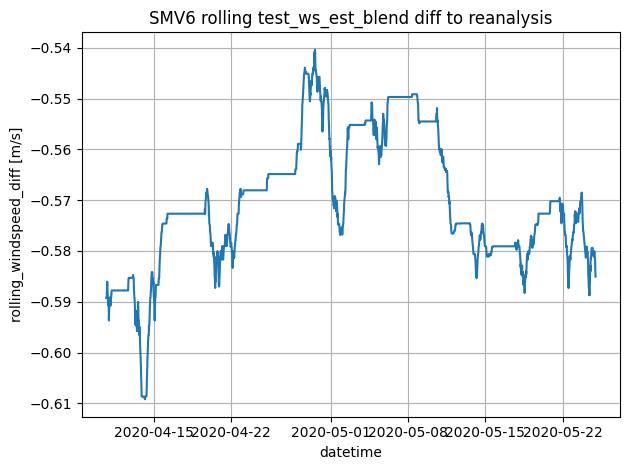

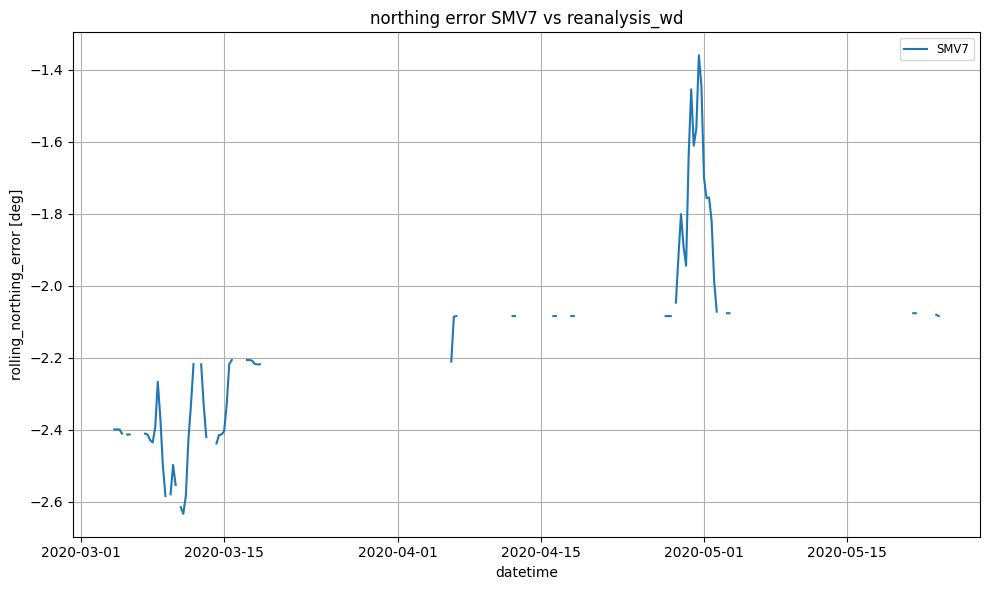

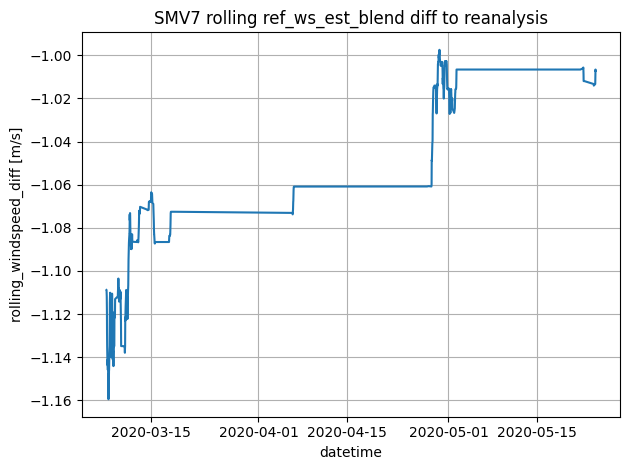

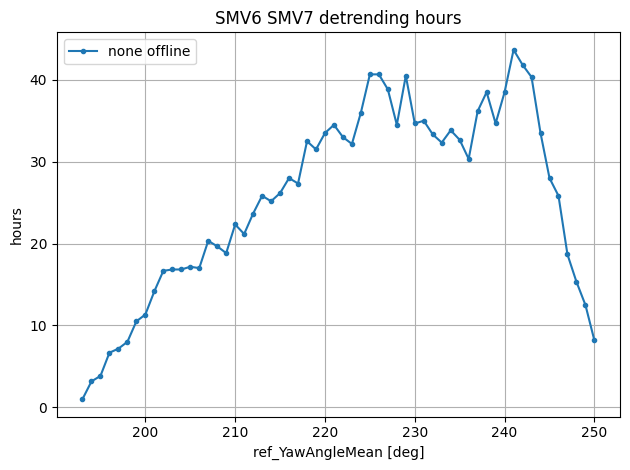

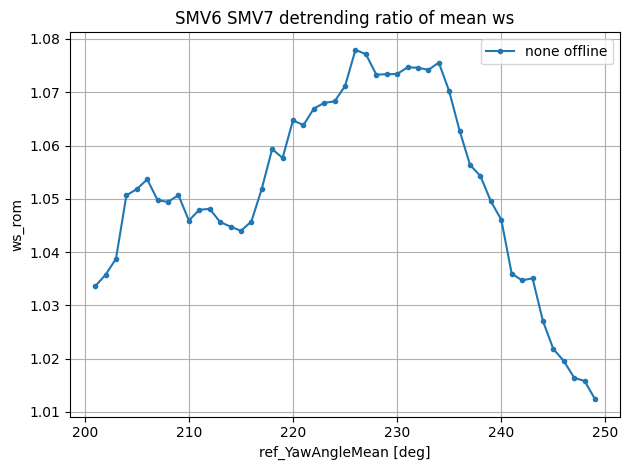

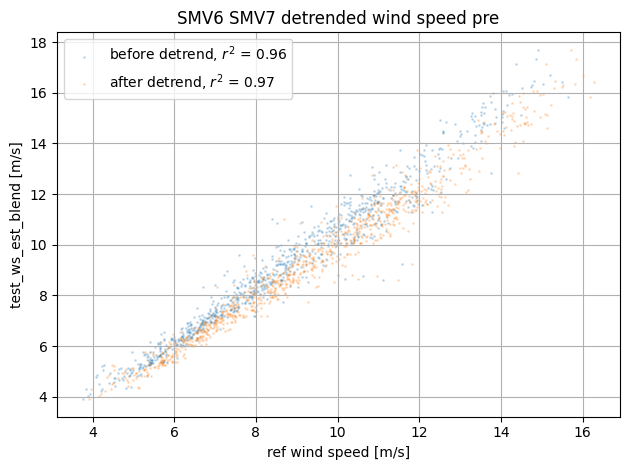

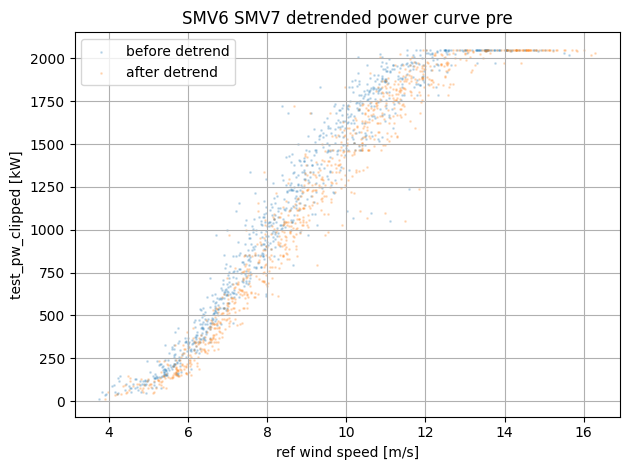

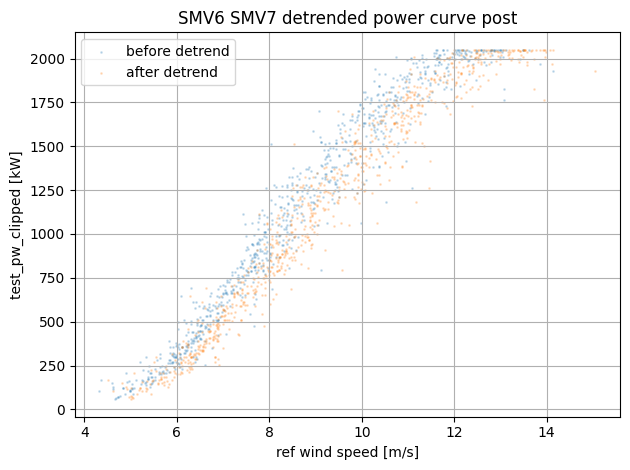

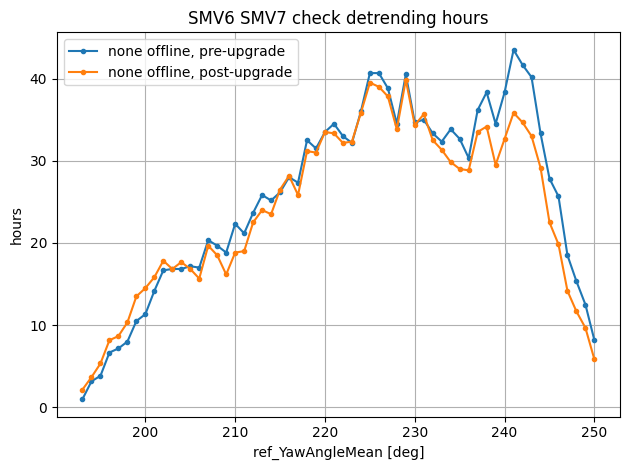

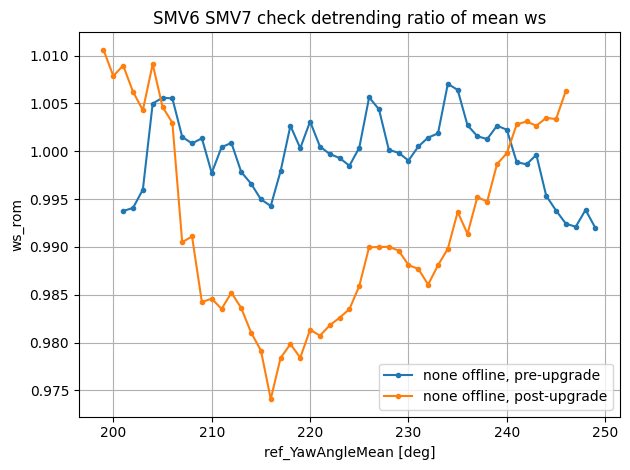

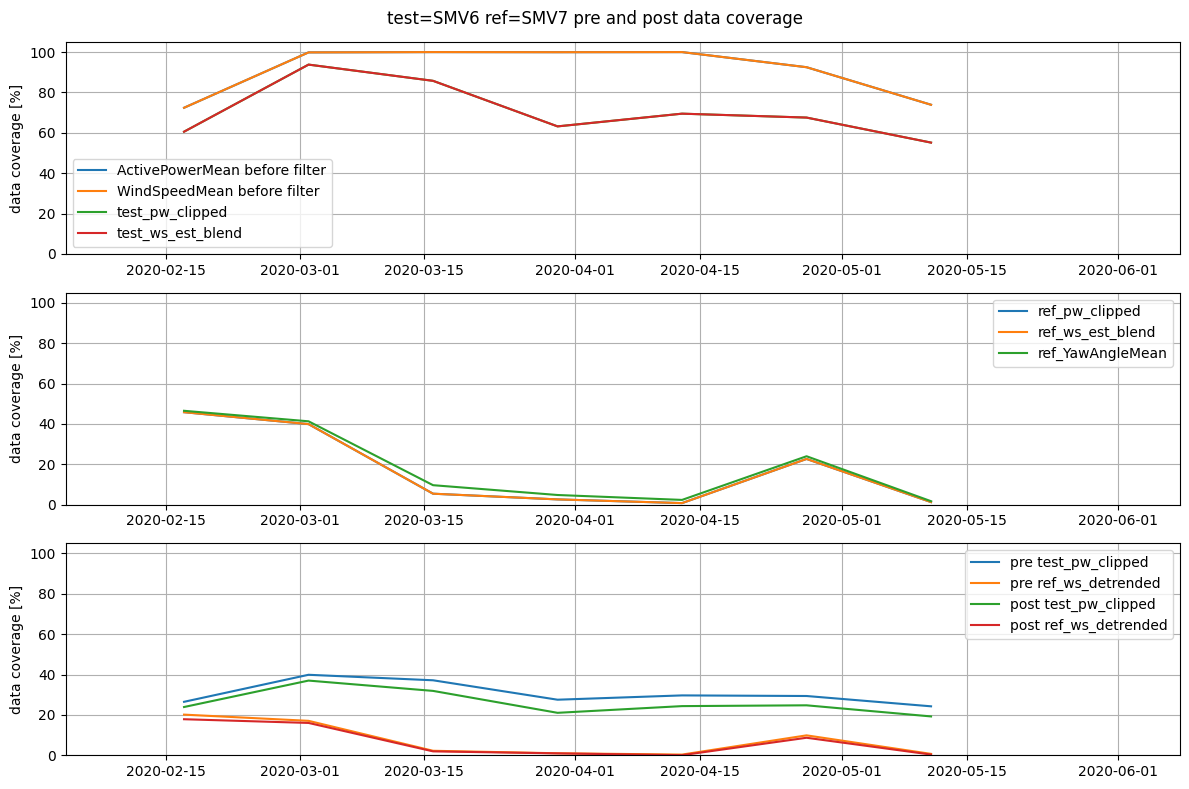

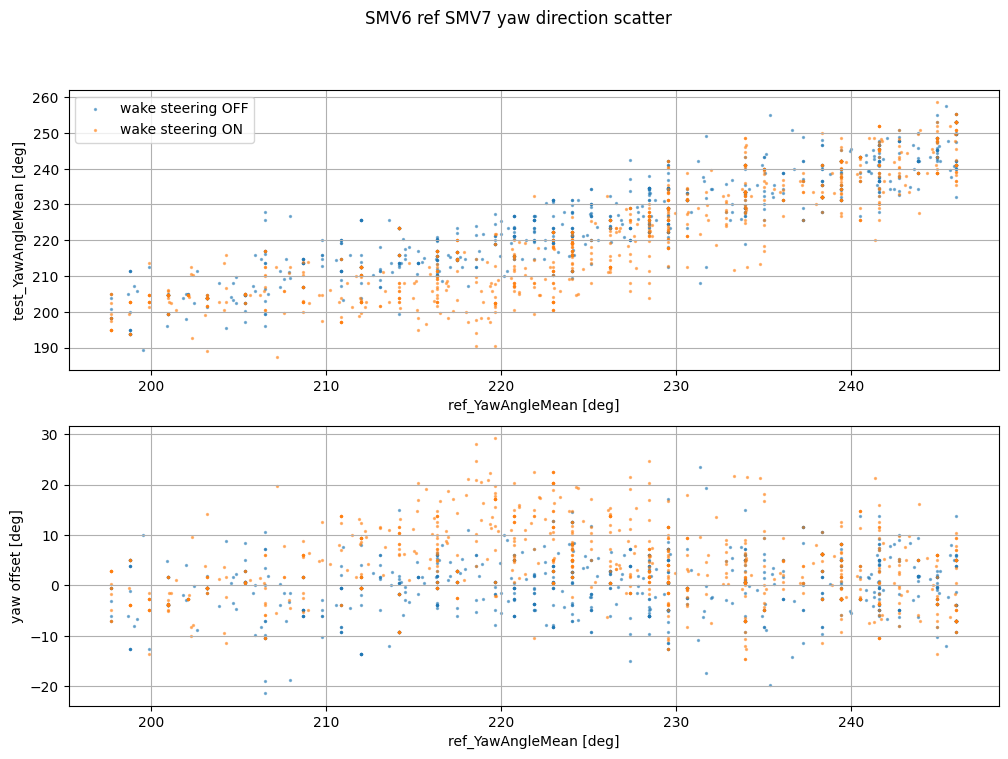

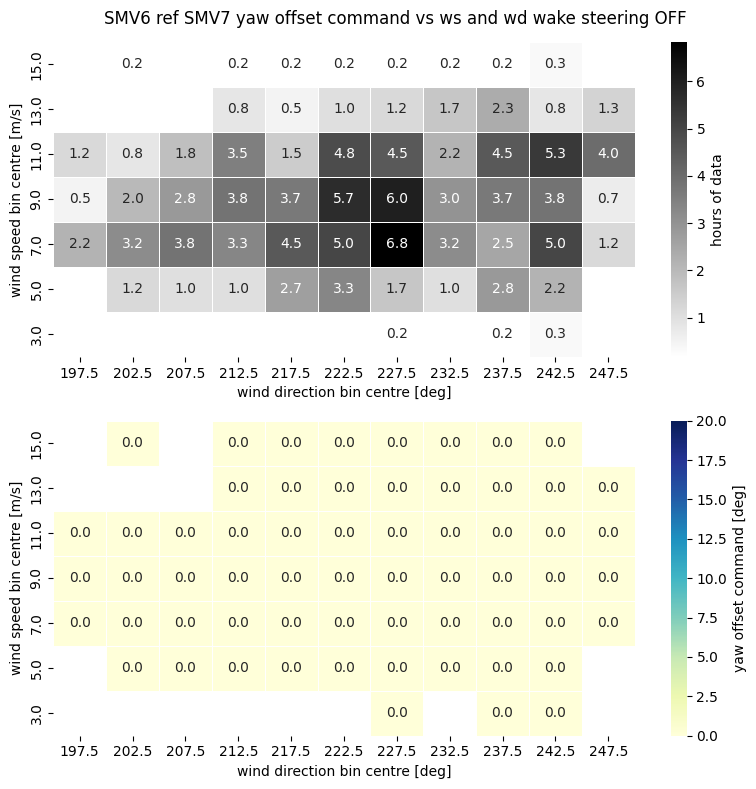

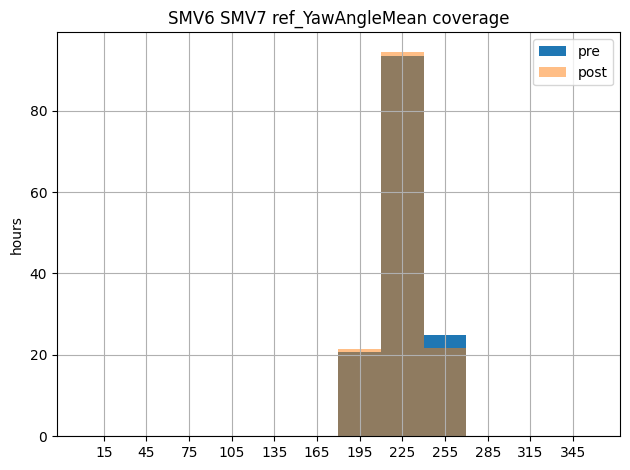

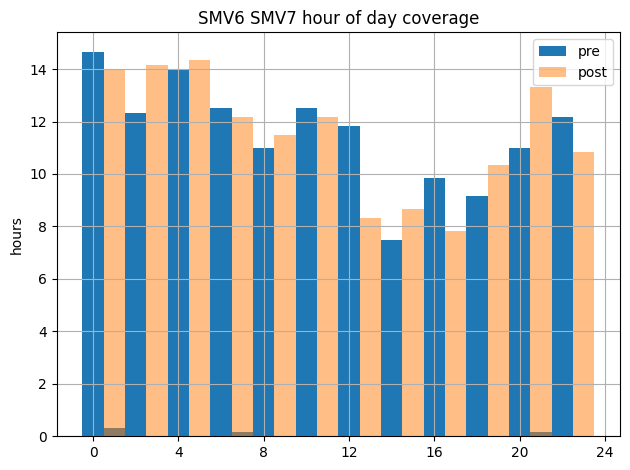

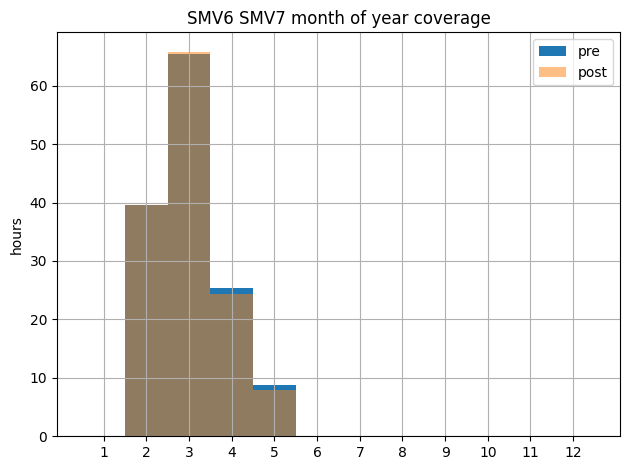

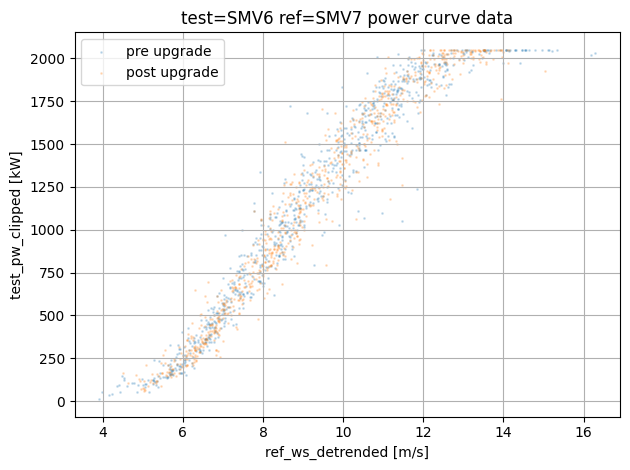

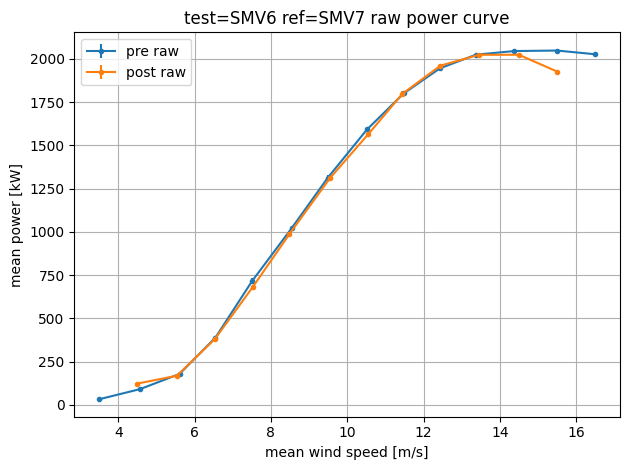

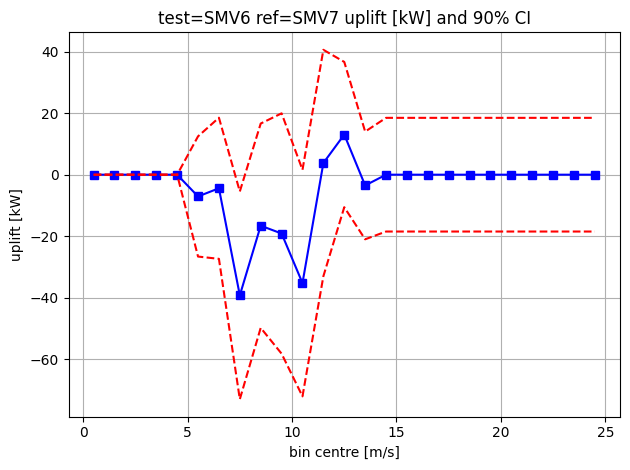

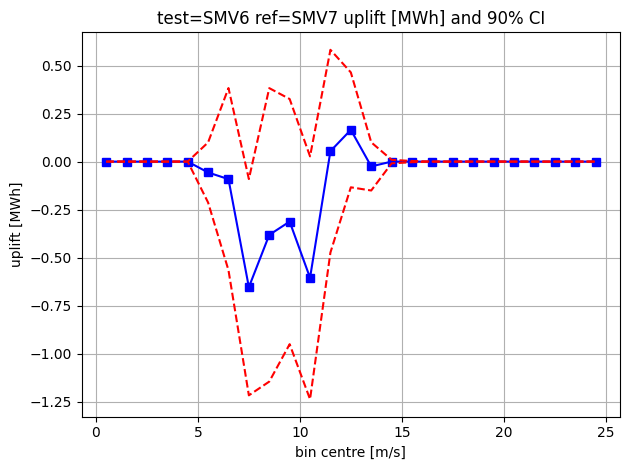

100%|██████████| 400/400 [01:46<00:00,  3.77it/s]


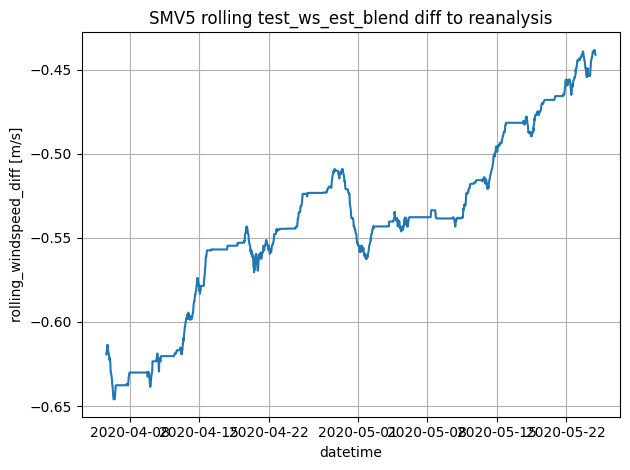

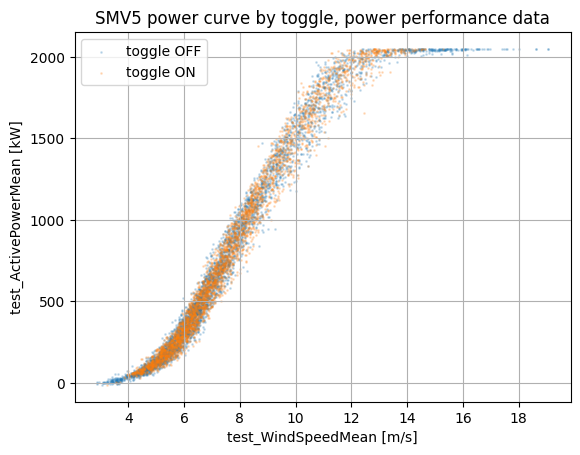

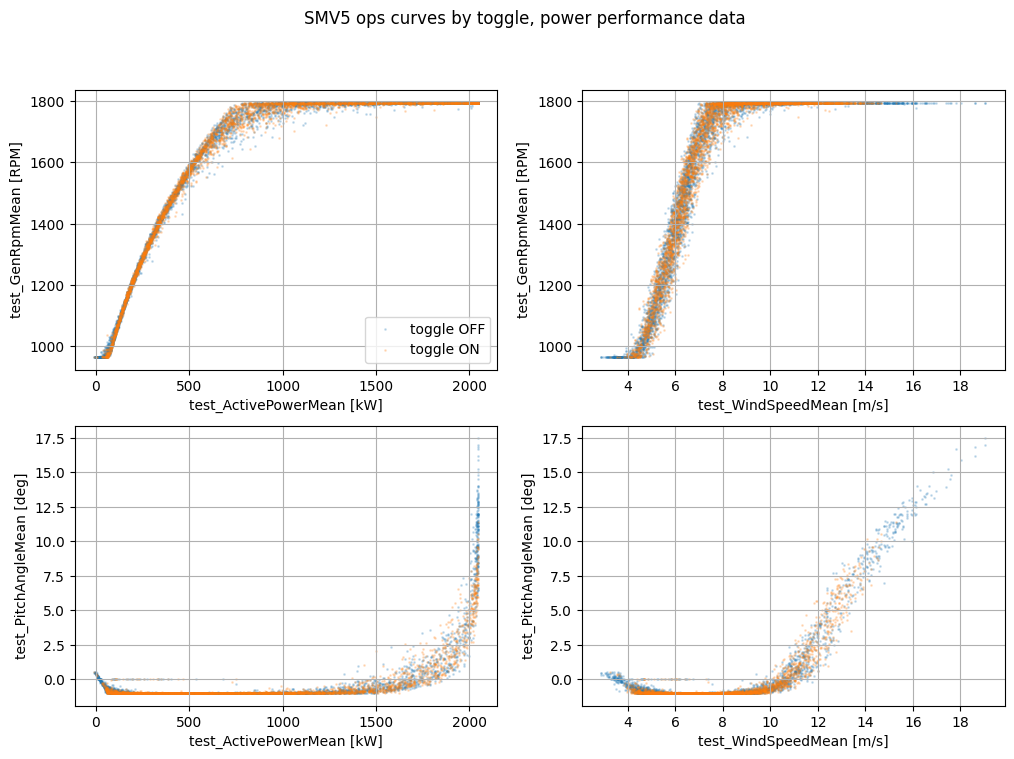

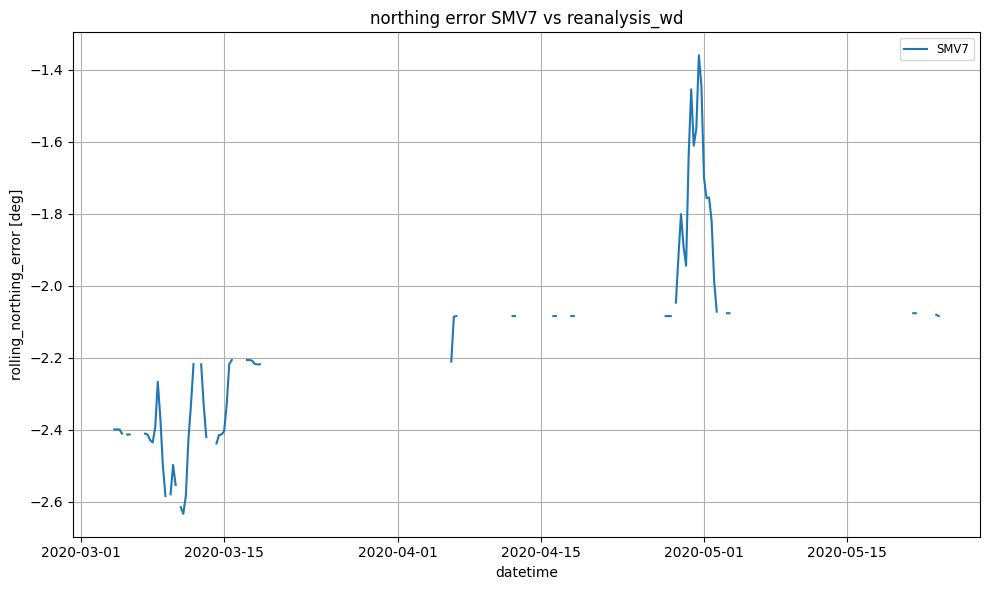

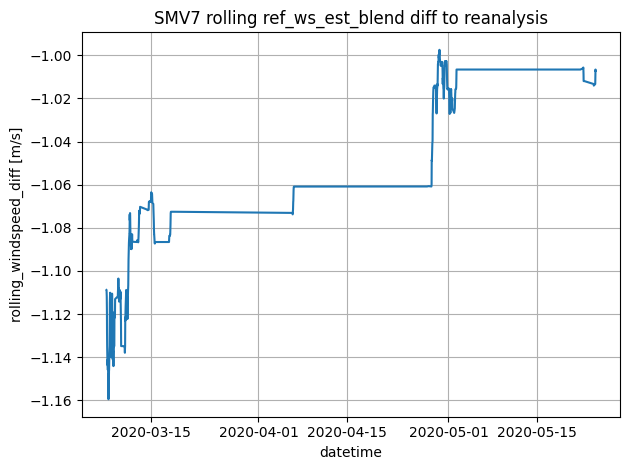

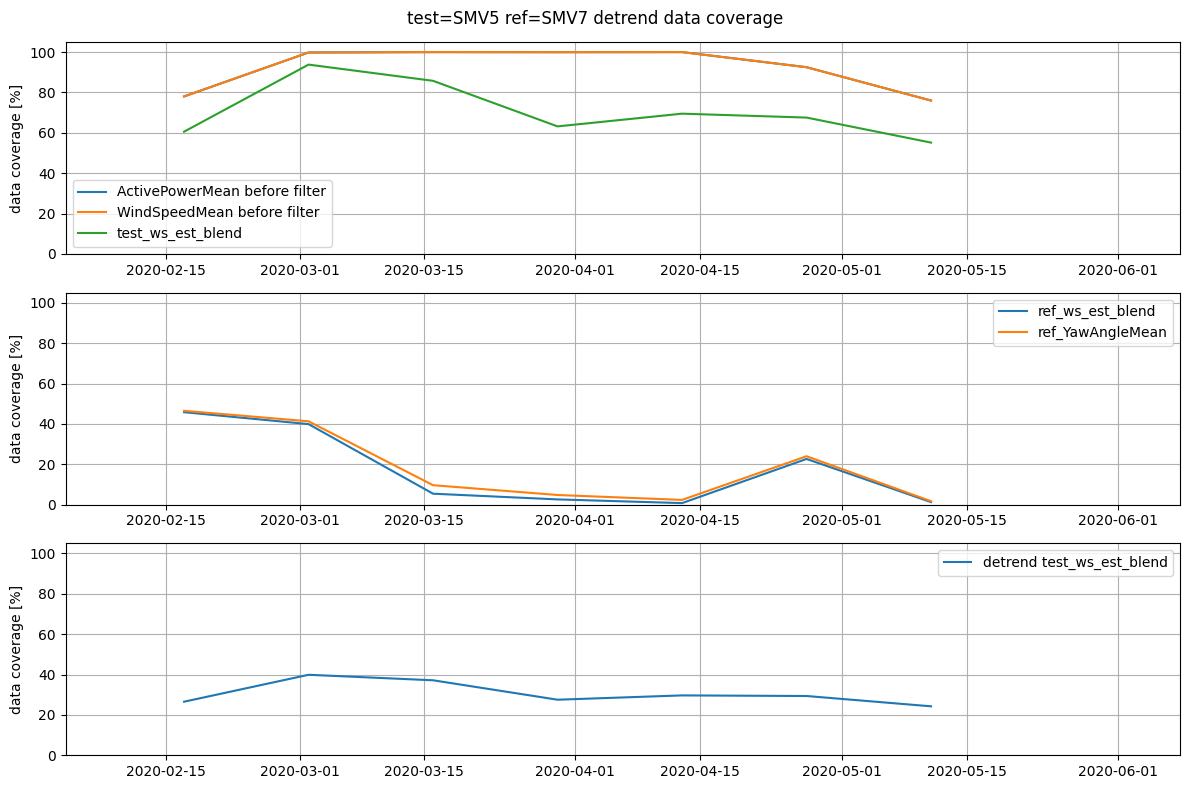

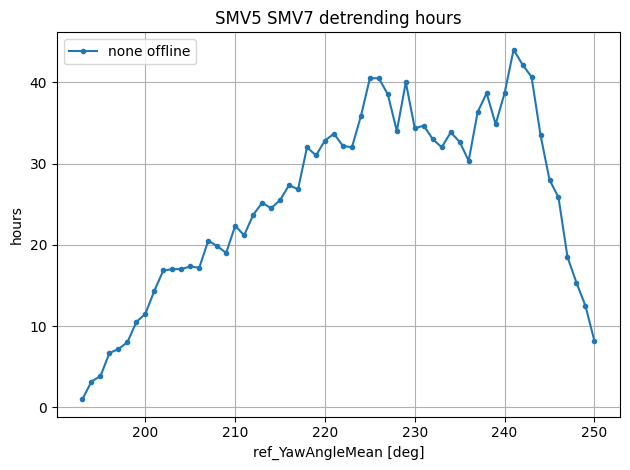

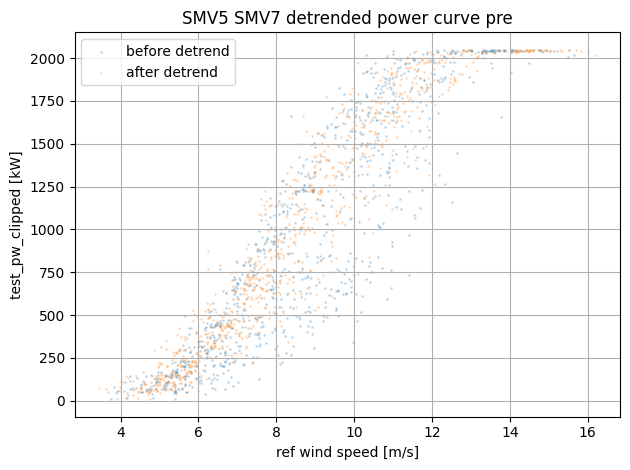

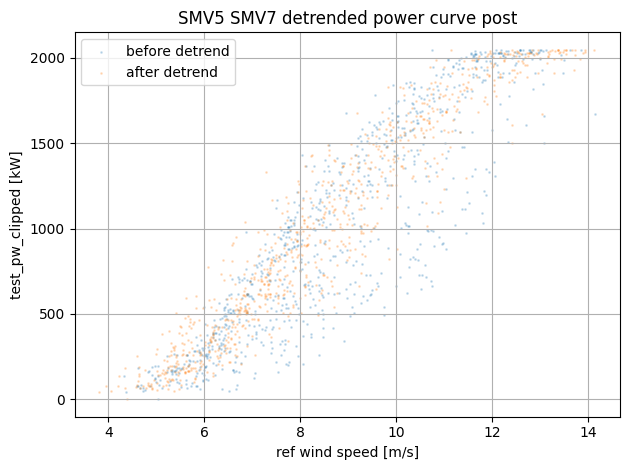

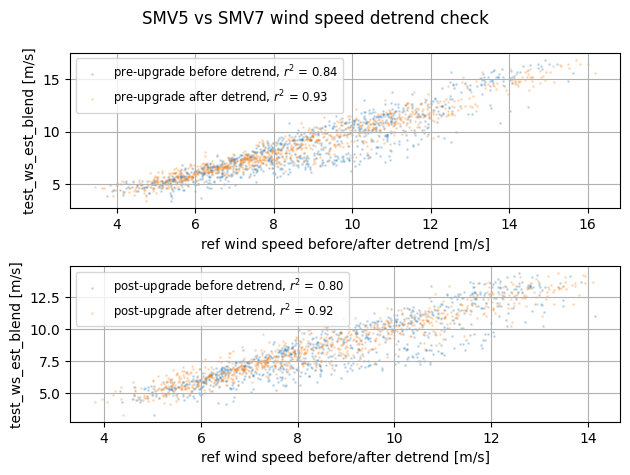

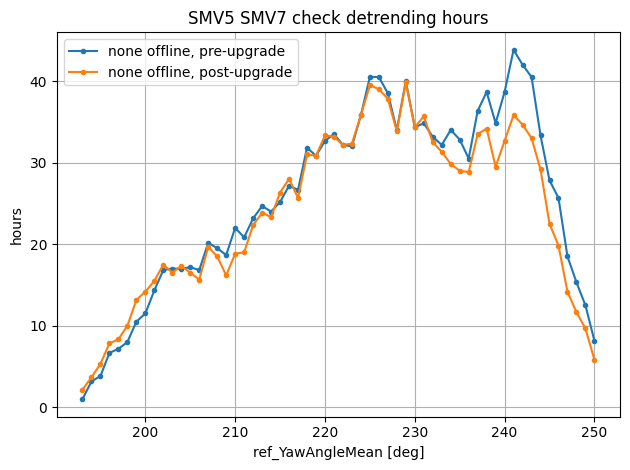

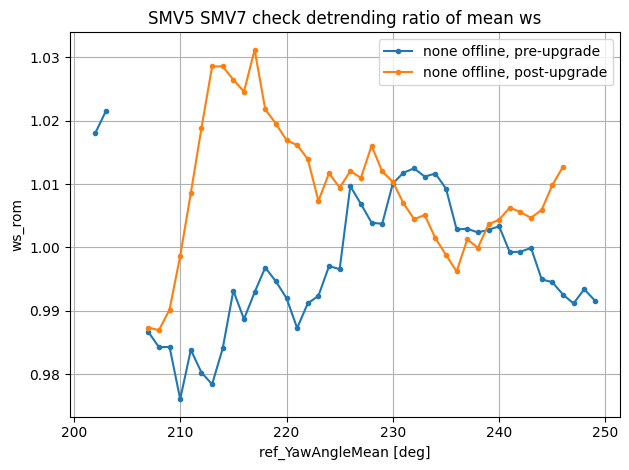

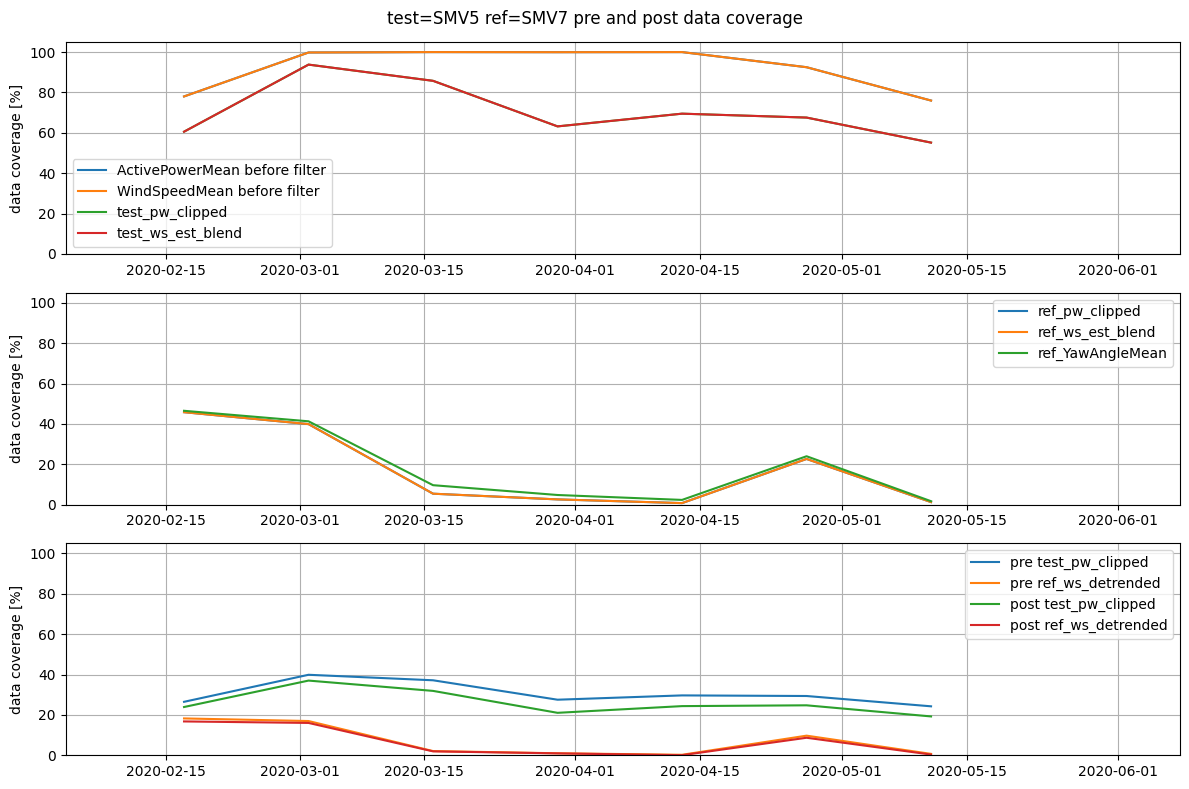

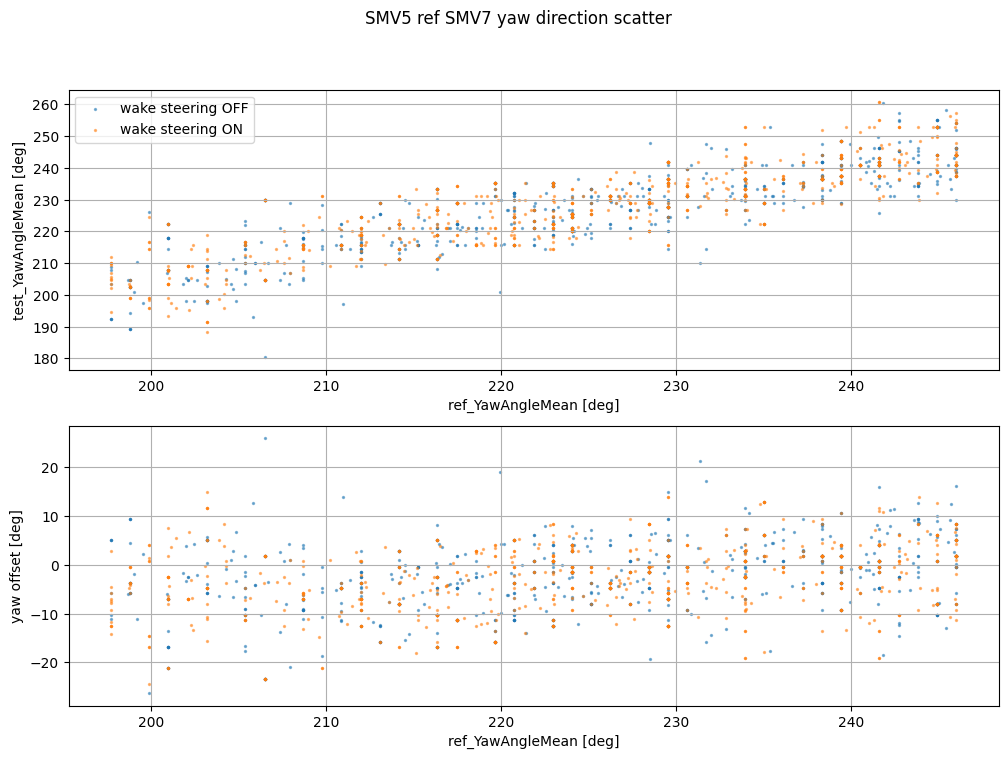

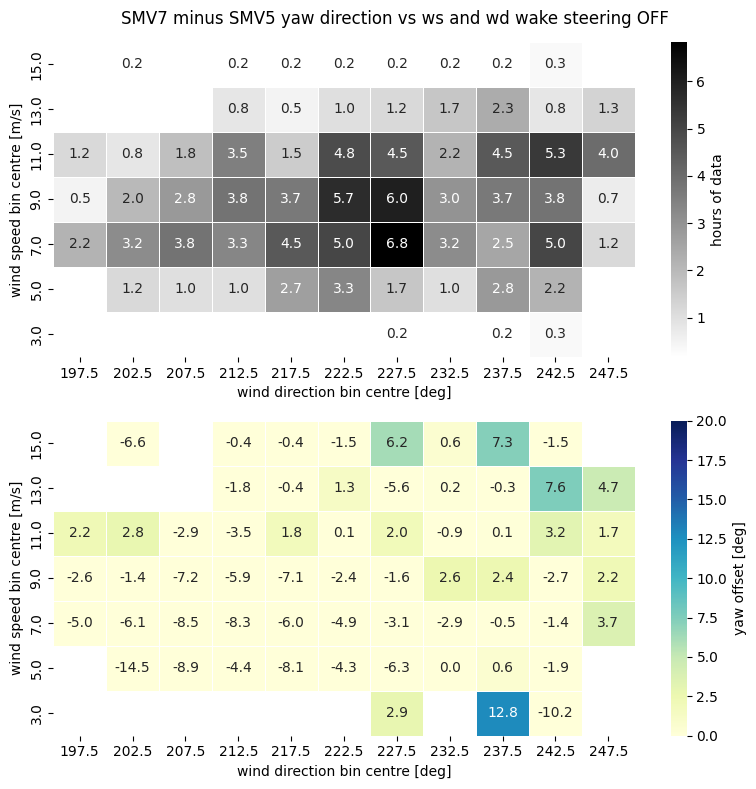

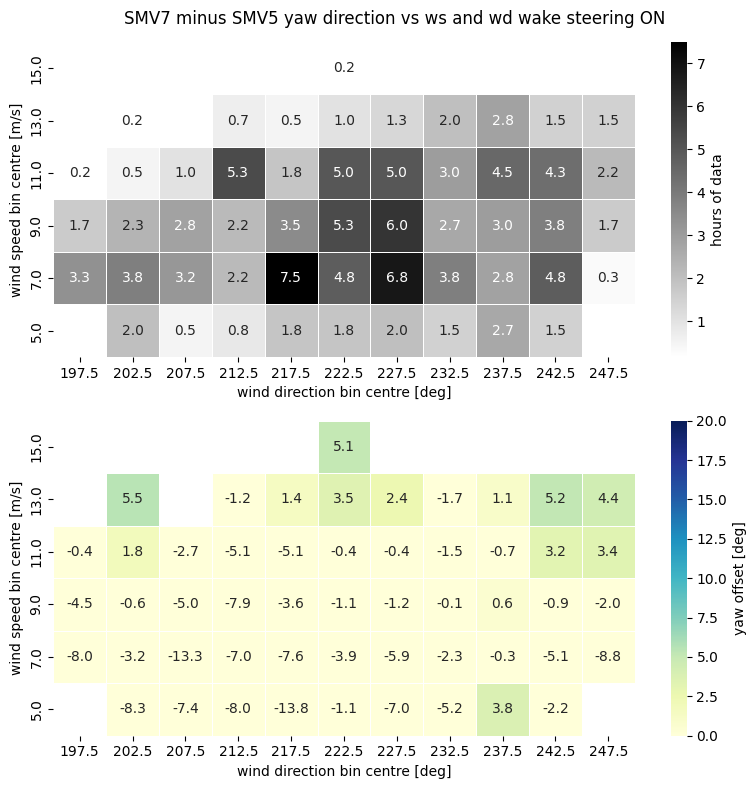

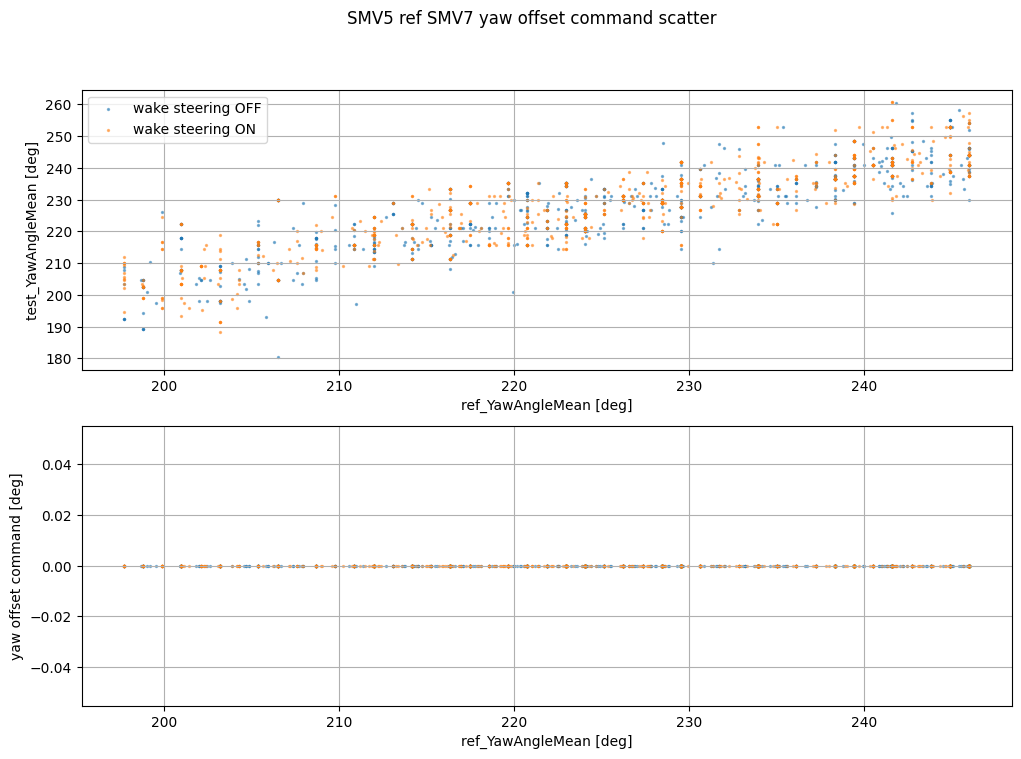

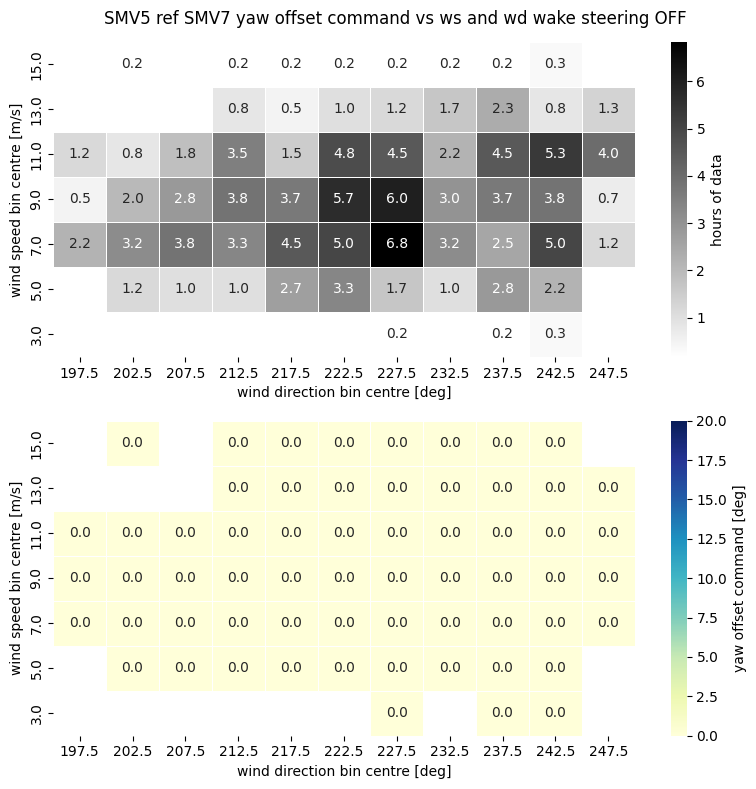

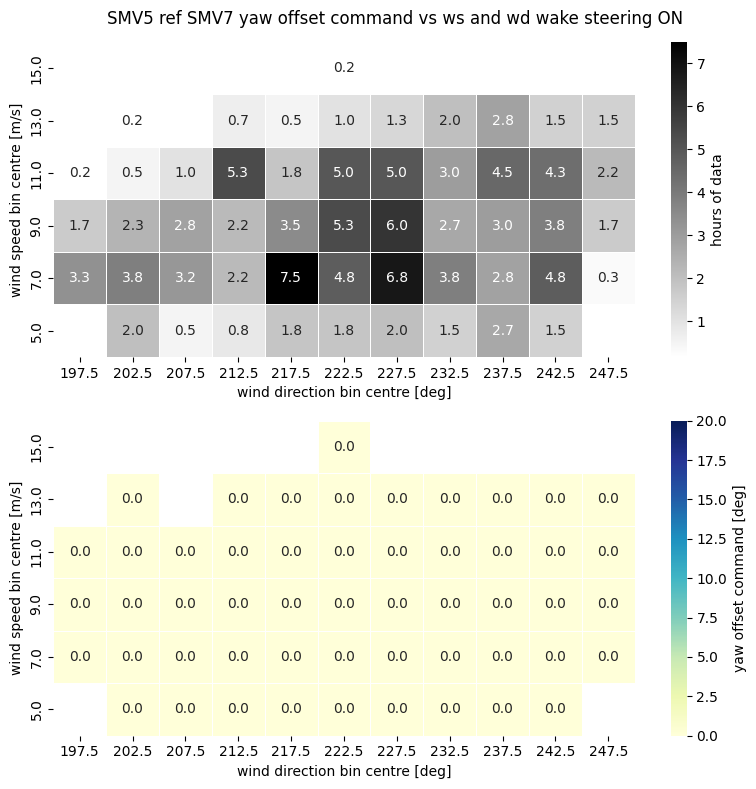

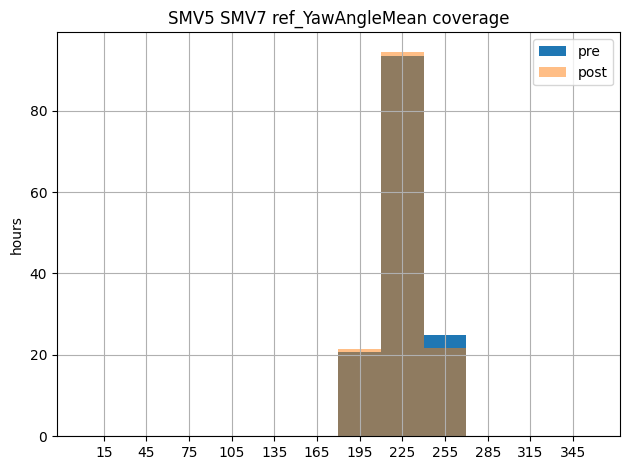

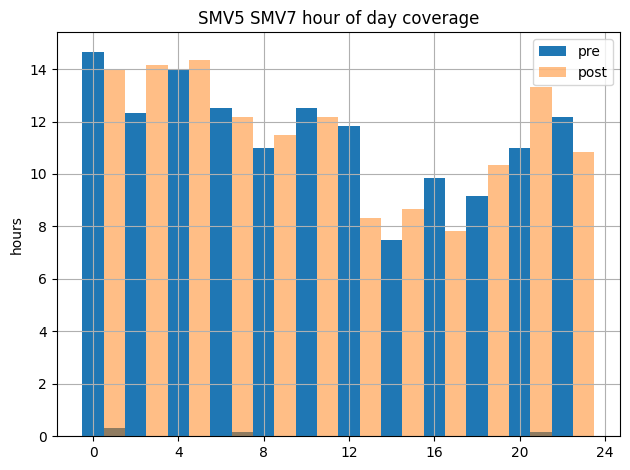

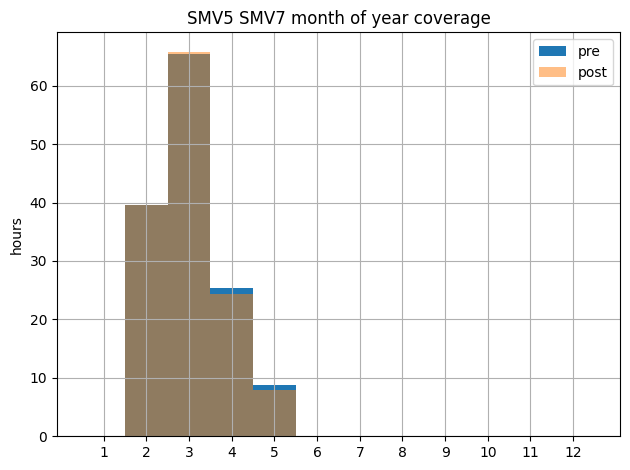

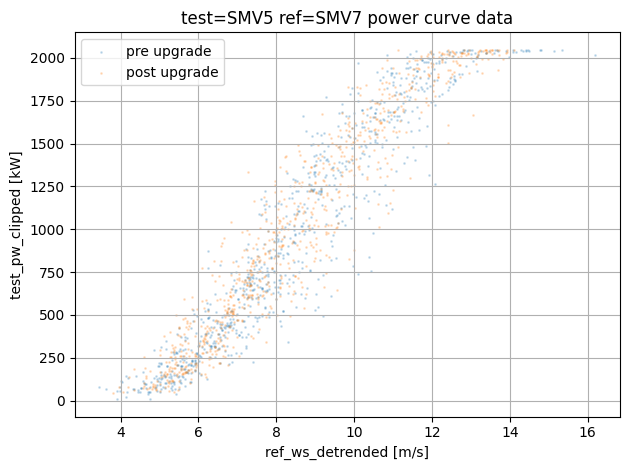

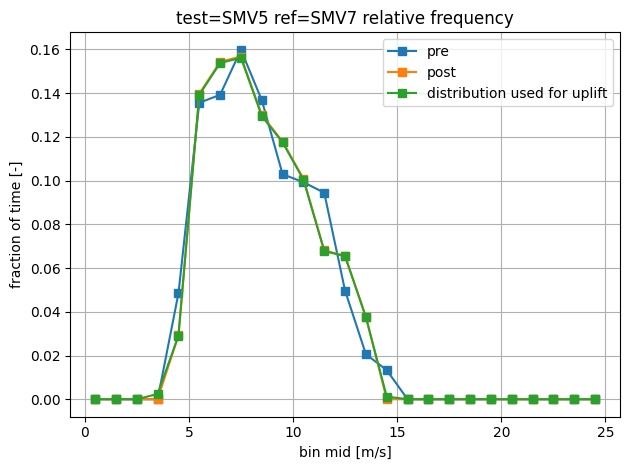

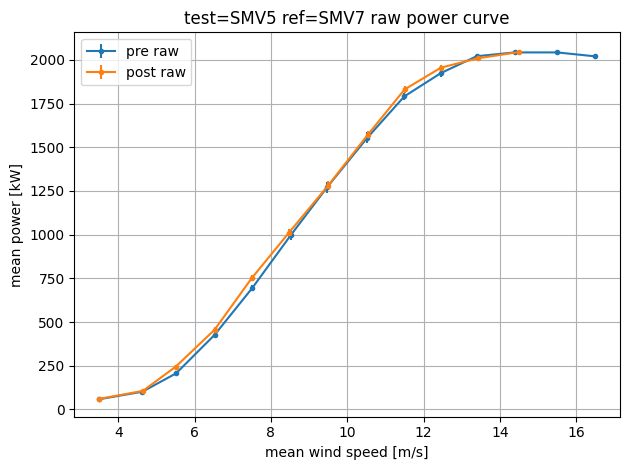

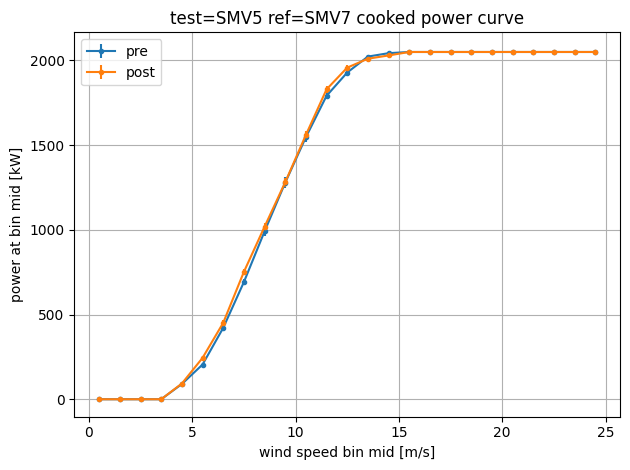

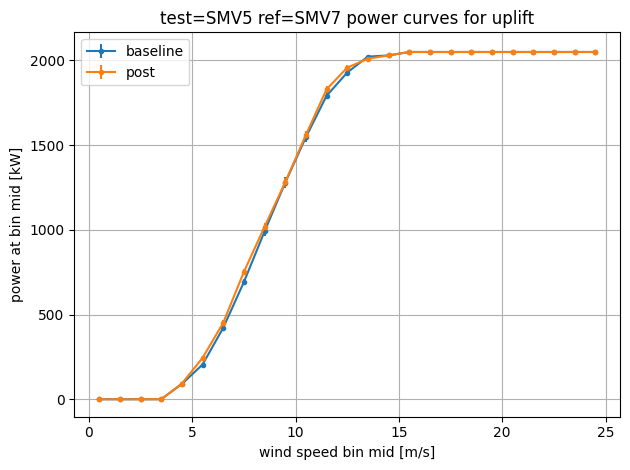

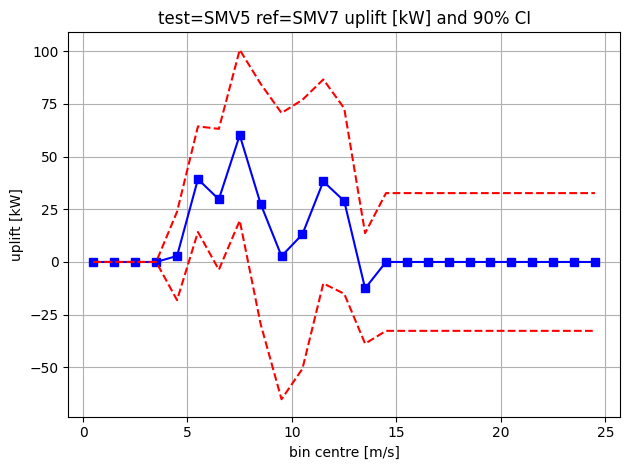

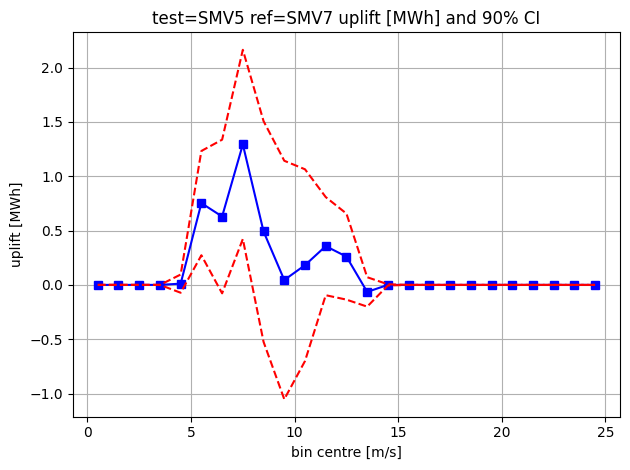

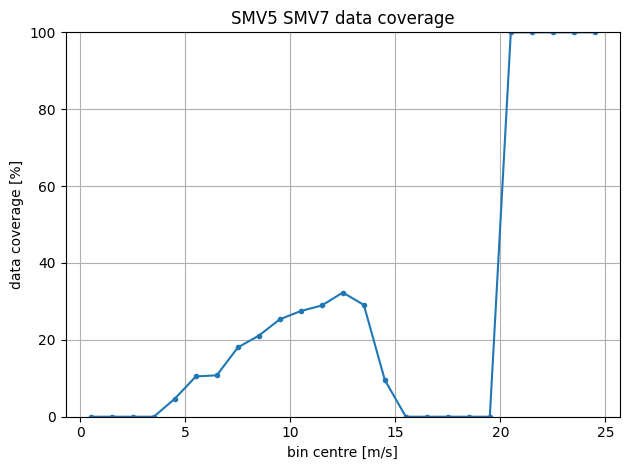

100%|██████████| 400/400 [02:05<00:00,  3.20it/s]


In [13]:
results_per_test_ref_df = run_wind_up_analysis(assessment_inputs)